## Job monitoring
- You know but let us write again

In [8]:
from qiskit import *
from qiskit import IBMQ
IBMQ.load_account()
from qiskit.tools.monitor import job_monitor

E:\ANACONDA\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-01-03 12:55:31,006: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
# firsrt get a backend 
# from a provider 
provider = IBMQ.get_provider('ibm-q')
backend = provider.get_backend('ibmq_valencia')

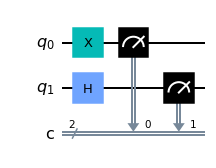

In [6]:
Q = QuantumCircuit(2,2)
Q.x(0)
Q.h(1)
Q.measure([0,1],[0,1])
Q.draw(output='mpl')

In [12]:
job = execute(Q,backend=backend,shots=1024)
job_monitor(job)
count = job.result().get_counts()
print(count) # because Q0 was always in 1 state so yes that is why this is like this.

Job Status: job has successfully run
{'00': 24, '01': 536, '10': 18, '11': 446}


In [10]:
#another tool

In [11]:
import qiskit.tools.jupyter 
%qiskit_job_watcher # this is nicer than job monitor! :D

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

## Toffoli Gate - CCX (11 to flip nhi to okay)
- Have implemented this 
- Let us see how to implement for more than two control qubits
- It is the <b>mct</b> gate

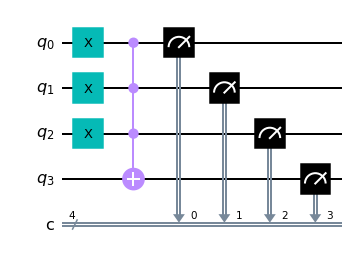

In [29]:
Q = QuantumCircuit(4,4)
Q.x([0,1,2])
Q.mct([0,1,2],3) # give the controls and give the target
Q.measure([0,1,2,3],[0,1,2,3])

Q.draw(output='mpl')


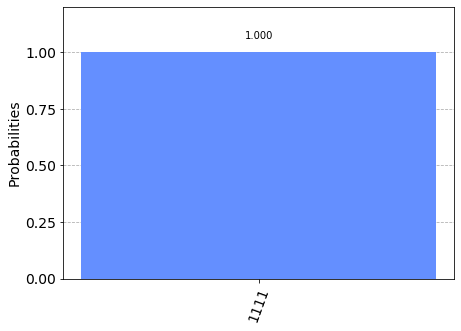

In [30]:
from qiskit.tools.visualization import plot_histogram
back = Aer.get_backend('qasm_simulator')
plot_histogram(execute(Q,backend=back,shots = 102400).result().get_counts())

### Yes , it is validated.

## How to change the version of qiskit

- Basically create a new environment with the downgraded version of the qiskit you want to use 
- Example :
    - #create new environment in conda
    - conda create --name qiskit-for-abe --clone (your qiskit envirnoment)
    - # then deactivate the current environment 
    - # activate the new environment and downgrade your version of qiskit
    - pip install -U qiskit==(verion you want)
- That is it, activate a jupyter notebook bas.